# Testing with Synthetic Data

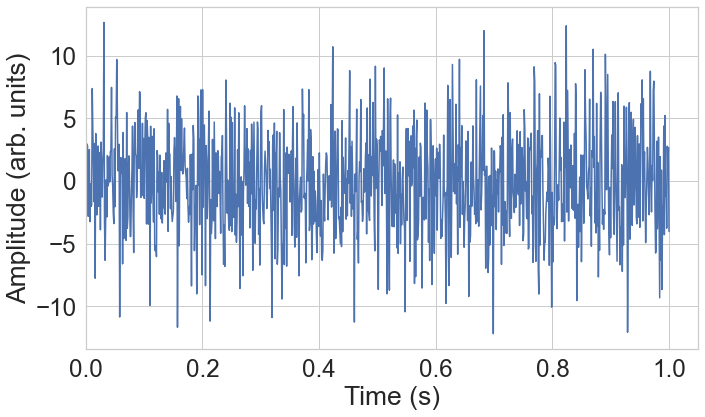

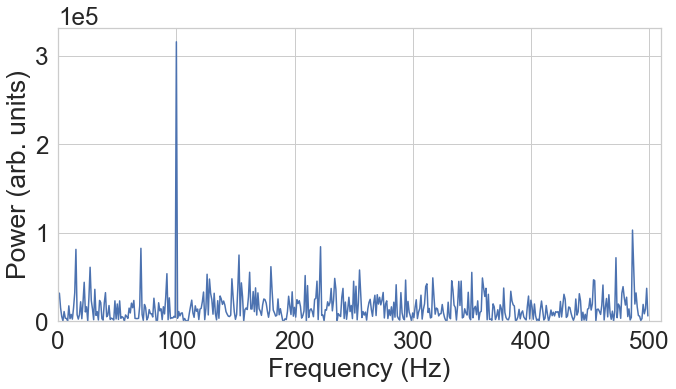

Recovered frequencies from spectrum: [ -15.   15.   70.  -70.  222. -222. -486.  486.  100. -100.]
Power of the peaks: [ 81288.61978623  81288.61978623  82486.47358496  82486.47358496
  84287.01660938  84287.01660938 103105.6487321  103105.6487321
 315873.97161194 315873.97161194]


In [174]:
#Testing the code with fake data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", font_scale=2.2)


# Parameters for synthetic data
num_samples = 1000
sampling_rate = 1000  # Hz
freq1 = 100  # Hz
noise_level = 4
time = np.linspace(0, 1, num_samples)

# Generate synthetic data
def generate_synthetic_data(num_sample, freq1, noise_level, t = np.linspace(0, 1, num_samples)):
    signal1 = np.sin(2 * np.pi * freq1 * t)
    noise = np.random.normal(0, noise_level, num_sample)
    synthetic_data = signal1 + noise
    return synthetic_data

# Perform Fourier transform to recover frequencies
def recover_frequencies(data, sampling_rate):
    N = len(data)
    frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
    fft_data = np.fft.fft(data)
    power_spectrum = np.abs(fft_data)**2
    return frequencies, power_spectrum

# Generate synthetic data
synthetic_data = generate_synthetic_data(num_samples, freq1,  noise_level)

# Plot synthetic data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=synthetic_data)
plt.tight_layout()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (arb. units)')
plt.xlim(0, )
plt.savefig('synthetic_data.png')

plt.show()

# Perform Fourier transform
frequencies, power_spectrum = recover_frequencies(synthetic_data, sampling_rate)

# Plot power spectrum
plt.figure(figsize=(10, 6))
sns.lineplot(x=frequencies, y=power_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arb. units)')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(0,510)
plt.ylim(0,)
plt.tight_layout()
plt.savefig('power_spectrum_synthetic.png')
plt.show()

# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-10:]  # Get indices of two highest peaks
freq_syn = frequencies[peaks_idx]  # Get corresponding frequencies
power_syn = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", freq_syn)
print("Power of the peaks:", power_syn)


## Shuffling

In [173]:
# Shuffle data up
rng = np.random.default_rng()


shuffled = synthetic_data.copy()
rng.shuffle(shuffled)
if np.array_equal(synthetic_data, shuffled):
    print("Data is not shuffled")


# Plot shuffled data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=shuffled)
#plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (arb. units)')
plt.show()

# Perform shuffled Fourier transform
frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)

# Plot the shuffled power spectrum
plt.figure(figsize=(10, 6))
power_spectrum[0] = 0 #setting to zero to remove the constant, non varying luminosity
sns.lineplot(x=frequencies, y=power_spectrum)
#plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arb. units)')
plt.xlim(0,)
plt.tight_layout()
plt.show()


# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-10:]  # Get indices of two highest peaks
peak_freqs = frequencies[peaks_idx]  # Get corresponding frequencies
peak_power = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", peak_freqs)
print("Power of the peaks:", peak_power)

ValueError: All arrays must be of the same length

<Figure size 720x432 with 0 Axes>

## Actually Shuffling Loads

In [149]:
n_trials = 1000000
peaks_syn = np.zeros(n_trials)
for i in range(n_trials):   
    shuffled = synthetic_data.copy()
    rng.shuffle(shuffled)
    frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)
    peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks
    peak_power = power_spectrum[peaks_idx]  # Get corresponding power
    #print("Power of the peaks:", peak_power[0]) # Power of the second highest peak, as highest is with zero frequency, the constant luminosity
    peaks_syn[i] = peak_power[0]
print(peaks_syn)
np.save('peaks_syn.npy', peaks_syn)

[111540.42597791 105113.65120587 128429.22566522 ... 101034.21952827
 101226.31699408 106929.04149773]


In [148]:
peaks_syn = np.load('peaks_syn.npy')
above_1st_peak = (peaks_syn > power_syn[-1]).sum()
print("Number of peaks above the 1st peak in the actual data:", above_1st_peak, "at frequency:", peak_freqs[-1], "Hz")
above_2nd_peak = (peaks_syn > power_syn[-3]).sum()
print("Number of peaks above the 2nd peak in the actual data:", above_2nd_peak, "at frequency:", peak_freqs[-3], "Hz")
above_3rd_peak = (peaks_syn > power_syn[-5]).sum()
print("Number of peaks above the 3rd peak in the actual data:", above_3rd_peak, "at frequency:", peak_freqs[-5], "Hz")
above_4th_peak = (peaks_syn > power_syn[-7]).sum()
print("Number of peaks above the 4th peak in the actual data:", above_4th_peak, "at frequency:", peak_freqs[-8], "Hz")
above_5th_peak = (peaks_syn > power_syn[-9]).sum()
print("Number of peaks above the 5th peak in the actual data:", above_5th_peak, "at frequency:", peak_freqs[-9], "Hz")

chance1st = above_1st_peak/n_trials
chance2nd = above_2nd_peak/n_trials
chance3rd = above_3rd_peak/n_trials
chance4th = above_4th_peak/n_trials
chance5th = above_5th_peak/n_trials

Number of peaks above the 1st peak in the actual data: 0 at frequency: 26.0 Hz
Number of peaks above the 2nd peak in the actual data: 2502 at frequency: -497.0 Hz
Number of peaks above the 3rd peak in the actual data: 3626 at frequency: 417.0 Hz
Number of peaks above the 4th peak in the actual data: 7439 at frequency: 309.0 Hz
Number of peaks above the 5th peak in the actual data: 9081 at frequency: 6.0 Hz


# Actual Data

## Doing Power Spectrum

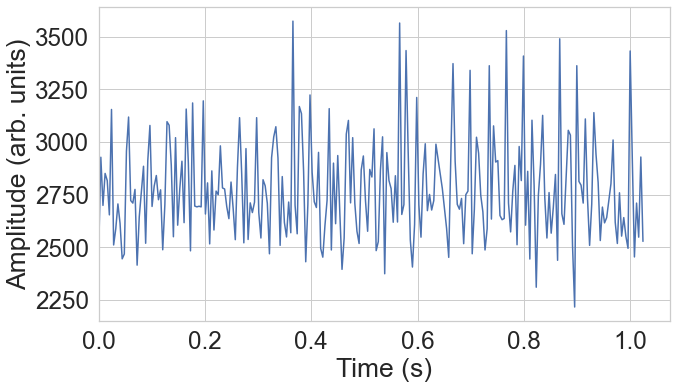

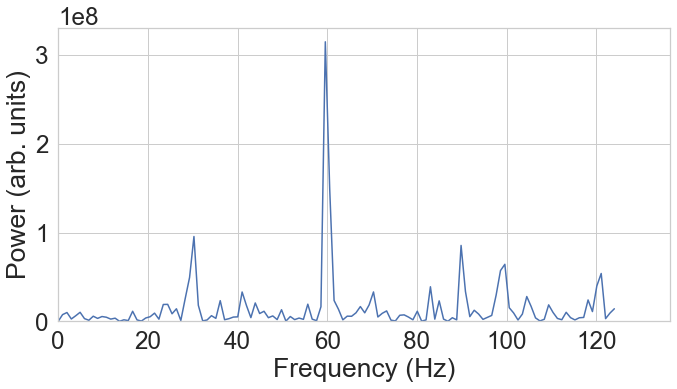

Recovered frequencies from spectrum: [  83.0078125  -83.0078125  120.1171875 -120.1171875   29.296875
  -29.296875   121.09375   -121.09375    -98.6328125   98.6328125
  -99.609375    99.609375    89.84375    -89.84375    -30.2734375
   30.2734375  -60.546875    60.546875   -59.5703125   59.5703125]
Power of peaks: [3.89064808e+07 3.89064808e+07 3.98419404e+07 3.98419404e+07
 4.94164063e+07 4.94164063e+07 5.38588470e+07 5.38588470e+07
 5.71171975e+07 5.71171975e+07 6.41952923e+07 6.41952923e+07
 8.54356971e+07 8.54356971e+07 9.55060162e+07 9.55060162e+07
 1.49044562e+08 1.49044562e+08 3.14806446e+08 3.14806446e+08]


In [167]:
data = np.genfromtxt('pulsar.dat') #import data
number_of_samples = len(data)
periodsample = 0.004 # seconds
time = np.linspace(0, number_of_samples*periodsample, number_of_samples)

# Plot actual data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=data)
#plt.title('Actual data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (arb. units)')
plt.tight_layout()
plt.xlim(0, )
plt.savefig('actual_data.png')
plt.show()

sampling_rate = 1/periodsample  # per milli second

# Perform Fourier transform
frequencies, power_spectrum = recover_frequencies(data, sampling_rate)
# Plot power spectrum
plt.figure(figsize=(10, 6))
power_spectrum[0] = 0 #setting to zero to remove the constant, non varying luminosity
sns.lineplot(x=frequencies, y=power_spectrum)
#plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arb. units)')
plt.xlim(0,)
plt.ylim(0,)
plt.tight_layout()
plt.savefig('power_spectrum_actual.png')
plt.show()


# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-20:]  # Get indices of two highest peaks
freqs_actual = frequencies[peaks_idx]  # Get corresponding frequencies
powers_actual = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", freqs_actual)
print("Power of peaks:", powers_actual)


## Shuffling

### Testing if shuffling works

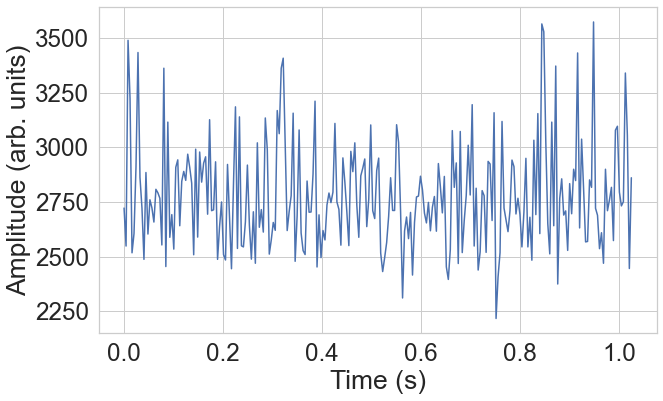

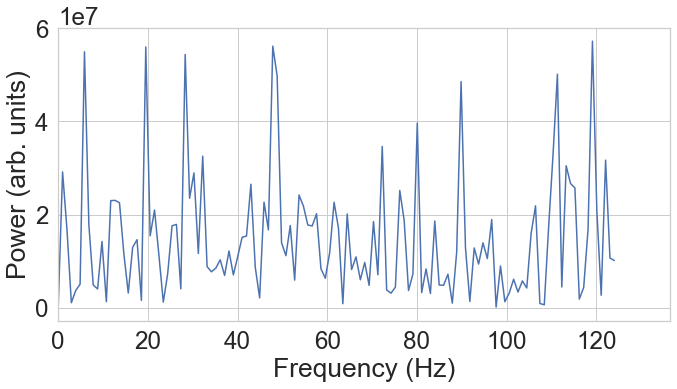

Recovered frequencies from spectrum: [119.140625]
Power of the peaks: [57233766.23473521]


In [166]:
# Shuffle data up
rng = np.random.default_rng()


shuffled = data.copy()
rng.shuffle(shuffled)
if np.array_equal(data, shuffled):
    print("Data is not shuffled")


# Plot shuffled data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=shuffled)
#plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (arb. units)')
plt.show()

# Perform shuffled Fourier transform
frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)

# Plot the shuffled power spectrum
plt.figure(figsize=(10, 6))
power_spectrum[0] = 0 #setting to zero to remove the constant, non varying luminosity
sns.lineplot(x=frequencies, y=power_spectrum)
#plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arb. units)')
plt.xlim(0,)
plt.tight_layout()
plt.show()


# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-1:]  # Get indices of two highest peaks
peak_freqs = frequencies[peaks_idx]  # Get corresponding frequencies
peak_power = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", peak_freqs)
print("Power of the peaks:", peak_power)


## Actual Shuffling

In [175]:
n_trials = 100000000
peaks = np.zeros(n_trials)
for i in range(n_trials):   
    shuffled = data.copy()
    rng.shuffle(shuffled)
    frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)
    peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks
    peak_power = power_spectrum[peaks_idx]  # Get corresponding power
    #print("Power of the peaks:", peak_power[0]) # Power of the second highest peak, as highest is with zero frequency, the constant luminosity
    peaks[i] = peak_power[0]
print(peaks)
np.save('peaks.npy', peaks)

[9.11534835e+07 6.76974035e+07 6.41905973e+07 ... 9.53310263e+07
 1.06053447e+08 6.92843562e+07]


## Finding probability of being statistical fluke

In [6]:
peaks = np.load('peaks.npy')
above_1st_peak = (peaks > powers_actual[-1]).sum()
print("Number of peaks above the 1st peak in the actual data:", above_1st_peak, "at frequency:", freqs_actual[-1], "Hz")
above_2nd_peak = (peaks > powers_actual[-3]).sum()
print("Number of peaks above the 2nd peak in the actual data:", above_2nd_peak, "at frequency:", freqs_actual[-3], "Hz")
above_3rd_peak = (peaks > powers_actual[-5]).sum()
print("Number of peaks above the 3rd peak in the actual data:", above_3rd_peak, "at frequency:", freqs_actual[-5], "Hz")
above_4th_peak = (peaks > powers_actual[-7]).sum()
print("Number of peaks above the 4th peak in the actual data:", above_4th_peak, "at frequency:", freqs_actual[-8], "Hz")
above_5th_peak = (peaks > powers_actual[-9]).sum()
print("Number of peaks above the 5th peak in the actual data:", above_5th_peak, "at frequency:", freqs_actual[-9], "Hz")

chance1st = above_1st_peak/n_trials
chance2nd = above_2nd_peak/n_trials
chance3rd = above_3rd_peak/n_trials
chance4th = above_4th_peak/n_trials
chance5th = above_5th_peak/n_trials

Number of peaks above the 1st peak in the actual data: 27 at frequency: 59.5703125 Hz
Number of peaks above the 2nd peak in the actual data: 58653 at frequency: 60.546875 Hz
Number of peaks above the 3rd peak in the actual data: 1931390 at frequency: 30.2734375 Hz
Number of peaks above the 4th peak in the actual data: 3531769 at frequency: 89.84375 Hz
Number of peaks above the 5th peak in the actual data: 8701951 at frequency: 99.609375 Hz


### Plotting it

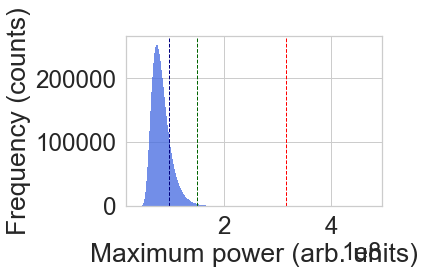

In [176]:
# Create histogram using Seaborn
sns.histplot(peaks, kde=False, color='royalblue')

# Add labels and title
plt.xlabel('Maximum power (arb. units)')
plt.ylabel('Frequency (counts)')
plt.tight_layout()
plt.axvline(powers_actual[-1], color='red', linestyle='dashed', linewidth=1, label='59.6 Hz')
plt.axvline(powers_actual[-3], color='darkgreen', linestyle='dashed', linewidth=1, label='60.5 Hz')
plt.axvline(powers_actual[-5], color='navy', linestyle='dashed', linewidth=1, label='30.3 Hz')

# Show plot
plt.show()

In [8]:
from statistics import NormalDist

sigma_first = NormalDist().inv_cdf((2 - chance1st) / 2.)
sigma_second = NormalDist().inv_cdf((2 - chance2nd) / 2.)
sigma_third = NormalDist().inv_cdf((2 - chance3rd) / 2.)
sigma_fourth = NormalDist().inv_cdf((2 - chance4th) / 2.)
sigma_fifth = NormalDist().inv_cdf((2 - chance5th) / 2.)
print("Sigma for the 1st peak:", sigma_first)
print("Sigma for the 2nd peak:", sigma_second)
print("Sigma for the 3rd peak:", sigma_third)
print("Sigma for the 4th peak:", sigma_fourth)
print("Sigma for the 5th peak:", sigma_fifth)

#Treating first second as independent events
sigma_combined60hz = NormalDist().inv_cdf((2 - chance1st * chance2nd) / 2.)
print("Sigma for the combined 1st and 2nd peak:", sigma_combined60hz)

Sigma for the 1st peak: 4.692414035387353
Sigma for the 2nd peak: 2.755218229784059
Sigma for the 3rd peak: 1.3013490643801593
Sigma for the 4th peak: 0.9284447784185146
Sigma for the 5th peak: 0.16341067299706255
Sigma for the combined 1st and 2nd peak: 5.652247755691892


## Folding data

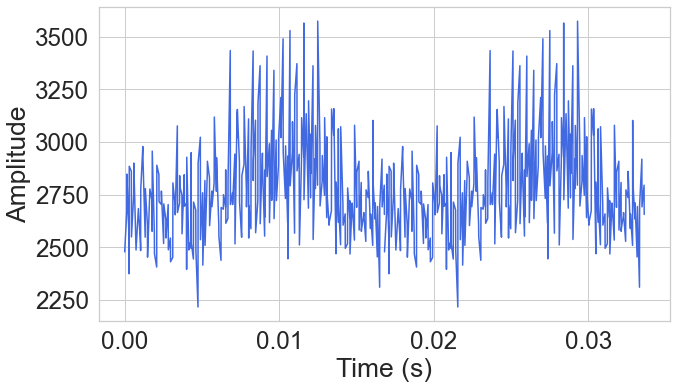

In [106]:
# Folding data
data = np.genfromtxt('pulsar.dat') #import data

def fold_data(foldfreq, time):
    foldperiod = 1/foldfreq
    foldedtime = time % foldperiod
    return foldedtime

testfreq = 59.5
foldedtime = fold_data(testfreq, time)

# Plot folded data
plt.figure(figsize=(10, 6))
sns.lineplot(x=foldedtime, y=data, color='royalblue')
sns.lineplot(x=foldedtime + 1/testfreq, y=data, color='royalblue')
#plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()



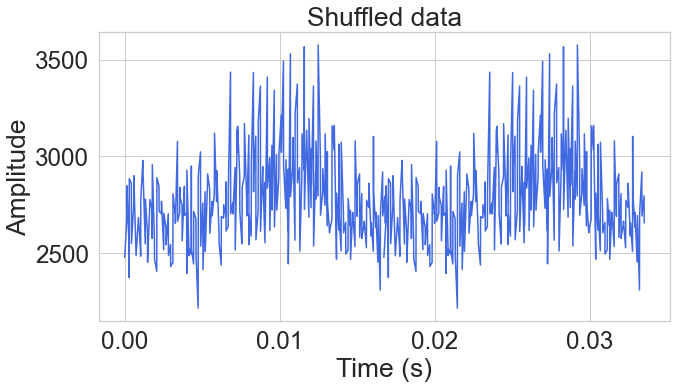

In [112]:
datus = data.copy()
tempo = foldedtime.copy()
idx   = np.argsort(tempo)

datus = np.array(datus)[idx]
tempo = np.array(tempo)[idx]

# Plot folded data
plt.figure(figsize=(10, 6))
sns.lineplot(x=tempo, y=datus, color='royalblue')
sns.lineplot(x=foldedtime + 1/testfreq, y=data, color='royalblue')
plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()


plt.show()

In [13]:
# Do a chi squared test
import scipy.stats as stats

avg = np.average(data)
print(stats.chisquare(binned))

NameError: name 'binned' is not defined

In [14]:
# Phase binning
def phase_binning(data, foldedtime, nbins, period):
    phase = foldedtime/period
    phase = phase - np.floor(phase)
    phase = np.round(phase * nbins).astype(int)
    phase_data = np.zeros(nbins)


    for i in range(nbins):
        if data[phase == i].size == 0:
            phase_data[i] = (np.mean(data[phase == i - 1]) + np.mean(data[phase == i + 1]))/2 # if no data in bin, take average of neighbouring bins
        else:
            phase_data[i] = np.mean(data[phase == i])


        #if i == 0:
            #data_corner = data[phase == 0] + data[phase == nbins - 1]
            #phase_data[i] = (np.mean(data[phase == i + 1]) + np.mean(data[phase == nbins - 1]))/2
        # dealing with edges
        #if data[phase == i].size == 0 and i == 0:
          #  phase_data[i] = (np.mean(data[phase == i + 1]) + np.mean(data[phase == len(bins)])) / 2
       # if data[phase == i].size == 0 and i == nbins - 1:
          #  phase_data[i] = np.mean(data[phase == i - 1])
    data_corner = np.concatenate((data[phase == 0], data[phase == nbins - 1]))
    phase_data[0] = np.mean(data_corner)
    phase_data[-1] = np.mean(data_corner)
    return phase_data

## Finding best frequency

In [15]:
i = 0
steps = 10000
min = 59.5
max = 60
bins = 12

Allchi = np.zeros(steps)
for f in np.linspace(min, max, steps):    
    datus = data.copy()
    foldedtime = fold_data(f, time)
    tempo = foldedtime.copy()
    idx   = np.argsort(tempo)
    datus = np.array(datus)[idx]
    tempo = np.array(tempo)[idx]
    binned = phase_binning(datus, tempo, bins, 1/f)
    chi2 = stats.chisquare(binned)
    Allchi[i] = chi2[0]
    i += 1
print(Allchi)
print(np.argmax(Allchi))
print('Maximum chi2:', np.max(Allchi))
print('At Freq = ', min+np.argmax(Allchi)/(steps/(max-min)), "Hz")
Pulsarfreq = min+np.argmax(Allchi)/(steps/(max-min))


[52.20266848 52.20266848 52.20266848 ... 41.60307072 41.60307072
 41.60307072]
5662
Maximum chi2: 73.52913454357379
At Freq =  59.7831 Hz


In [16]:
f = Pulsarfreq
datus = data.copy()
foldedtime = fold_data(f, time)
tempo = foldedtime.copy()
idx   = np.argsort(tempo)
datus = np.array(datus)[idx]
tempo = np.array(tempo)[idx]
binned = phase_binning(datus, tempo, bins, 1/f)
chi2 = stats.chisquare(binned, np.average(binned))
print(chi2)

Power_divergenceResult(statistic=73.52913454357379, pvalue=2.593440828099802e-11)


## Final binned plot of best frequency

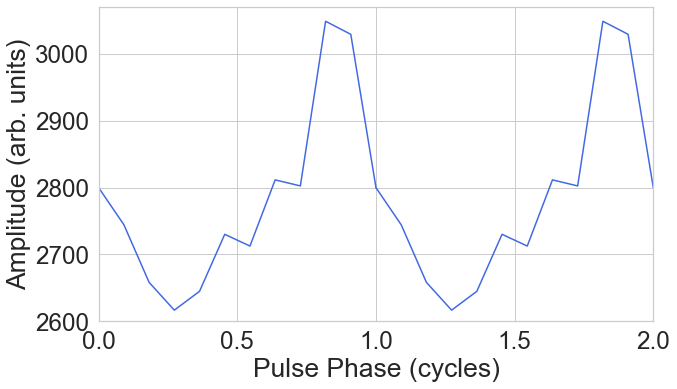

In [111]:
testfreq = Pulsarfreq
#binned = phase_binning(datus, tempo, 30, 1/testfreq)

# Plot folded data
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.linspace(0, 1, num=len(binned)), y=binned, color='royalblue')
sns.lineplot(x=np.linspace(0, 1, num=len(binned)) + 1, y=binned, color='royalblue')
plt.xlabel('Pulse Phase (cycles)')
plt.ylabel('Amplitude (arb. units)')
plt.xlim(0, 2)
plt.ylim(2600,)
plt.tight_layout()
plt.savefig('binned_data.png')
plt.show()


In [ ]:
Most probable pulsar PSR J1748-2021B